# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost 

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models. 

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps. 

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM. 

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records. 

There are numerical features such as: 

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install CatBoost

In [ ]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
data = pd.read_csv('wa_fn_usec_hr_employee_attrition_tsv.csv')
data

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Check the shape of dataframe. 
# YOUR CODE HERE
data.shape

(1470, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [ ]:
# YOUR CODE HERE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [ ]:
data.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_numerical = data.select_dtypes(include=['int64','float64']).columns
df_categorical = data.select_dtypes(include=['object']).columns

In [ ]:
# drop null values
data = data.dropna()

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

<Axes: xlabel='attrition', ylabel='yearswithcurrmanager'>

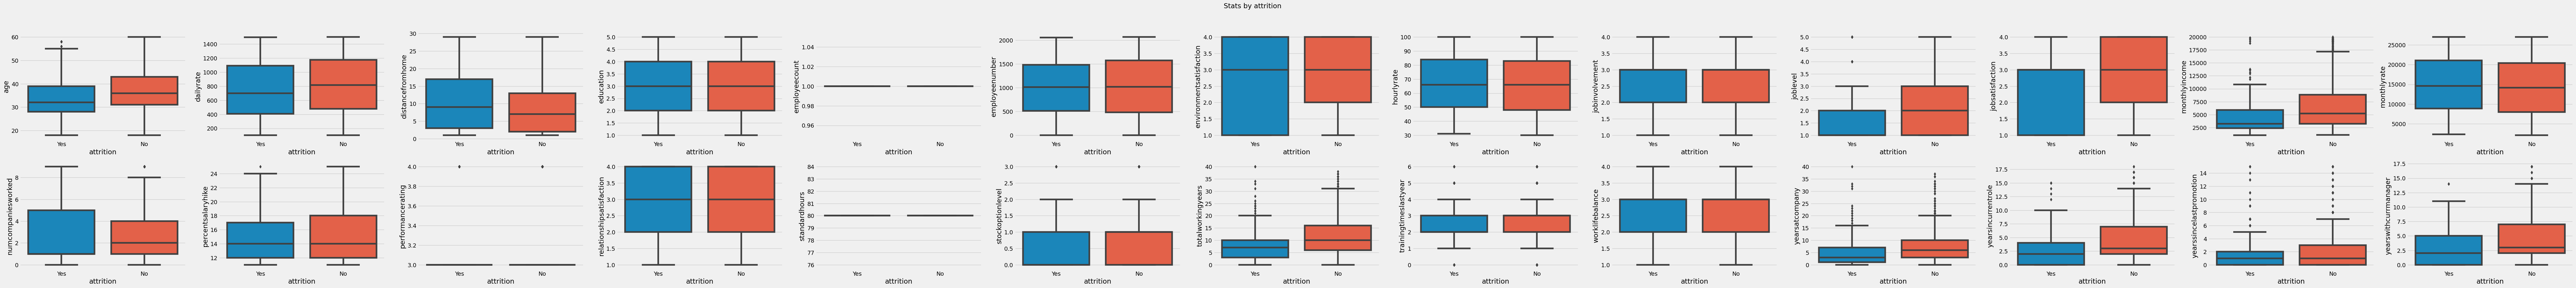

In [ ]:
# Check for outliers
# YOUR CODE HERE
fig, axes = plt.subplots(2, 13, figsize=(100, 10))

fig.suptitle('Stats by attrition')

sns.boxplot(ax=axes[0, 0], data=data, x='attrition', y=df_numerical[0])
sns.boxplot(ax=axes[0, 1], data=data, x='attrition', y=df_numerical[1])
sns.boxplot(ax=axes[0, 2], data=data, x='attrition', y=df_numerical[2])
sns.boxplot(ax=axes[0, 3], data=data, x='attrition', y=df_numerical[3])
sns.boxplot(ax=axes[0, 4], data=data, x='attrition', y=df_numerical[4])
sns.boxplot(ax=axes[0, 5], data=data, x='attrition', y=df_numerical[5])
sns.boxplot(ax=axes[0, 6], data=data, x='attrition', y=df_numerical[6])
sns.boxplot(ax=axes[0, 7], data=data, x='attrition', y=df_numerical[7])
sns.boxplot(ax=axes[0, 8], data=data, x='attrition', y=df_numerical[8])
sns.boxplot(ax=axes[0, 9], data=data, x='attrition', y=df_numerical[9])
sns.boxplot(ax=axes[0, 10], data=data, x='attrition', y=df_numerical[10])
sns.boxplot(ax=axes[0, 11], data=data, x='attrition', y=df_numerical[11])
sns.boxplot(ax=axes[0, 12], data=data, x='attrition', y=df_numerical[12])


sns.boxplot(ax=axes[1, 0], data=data, x='attrition', y=df_numerical[13])
sns.boxplot(ax=axes[1, 1], data=data, x='attrition', y=df_numerical[14])
sns.boxplot(ax=axes[1, 2], data=data, x='attrition', y=df_numerical[15])
sns.boxplot(ax=axes[1, 3], data=data, x='attrition', y=df_numerical[16])
sns.boxplot(ax=axes[1, 4], data=data, x='attrition', y=df_numerical[17])
sns.boxplot(ax=axes[1, 5], data=data, x='attrition', y=df_numerical[18])
sns.boxplot(ax=axes[1, 6], data=data, x='attrition', y=df_numerical[19])
sns.boxplot(ax=axes[1, 7], data=data, x='attrition', y=df_numerical[20])
sns.boxplot(ax=axes[1, 8], data=data, x='attrition', y=df_numerical[21])
sns.boxplot(ax=axes[1, 9], data=data, x='attrition', y=df_numerical[22])
sns.boxplot(ax=axes[1, 10], data=data, x='attrition', y=df_numerical[23])
sns.boxplot(ax=axes[1, 11], data=data, x='attrition', y=df_numerical[24])
sns.boxplot(ax=axes[1, 12], data=data, x='attrition', y=df_numerical[25])

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# YOUR CODE HERE
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
# lowerbound,upperbound = outlier_treatment(data.monthlyincome)
# data.drop(data[ (data.monthlyincome > upperbound) | (data.monthlyincome < lowerbound) ].index , inplace=True)

# lowerbound,upperbound = outlier_treatment(data.yearssincelastpromotion)
# data.drop(data[ (data.yearssincelastpromotion > upperbound) | (data.yearssincelastpromotion < lowerbound) ].index , inplace=True)

# lowerbound,upperbound = outlier_treatment(data.totalworkingyears)
# data.drop(data[ (data.totalworkingyears > upperbound) | (data.totalworkingyears < lowerbound) ].index , inplace=True)

for col in data.select_dtypes(include='number'):
    lowerbound,upperbound = outlier_treatment(data[col])
    data.drop(data[ (data[col] > upperbound) | (data[col] < lowerbound) ].index , inplace=True)

data.shape

(699, 35)

<Axes: xlabel='attrition', ylabel='yearswithcurrmanager'>

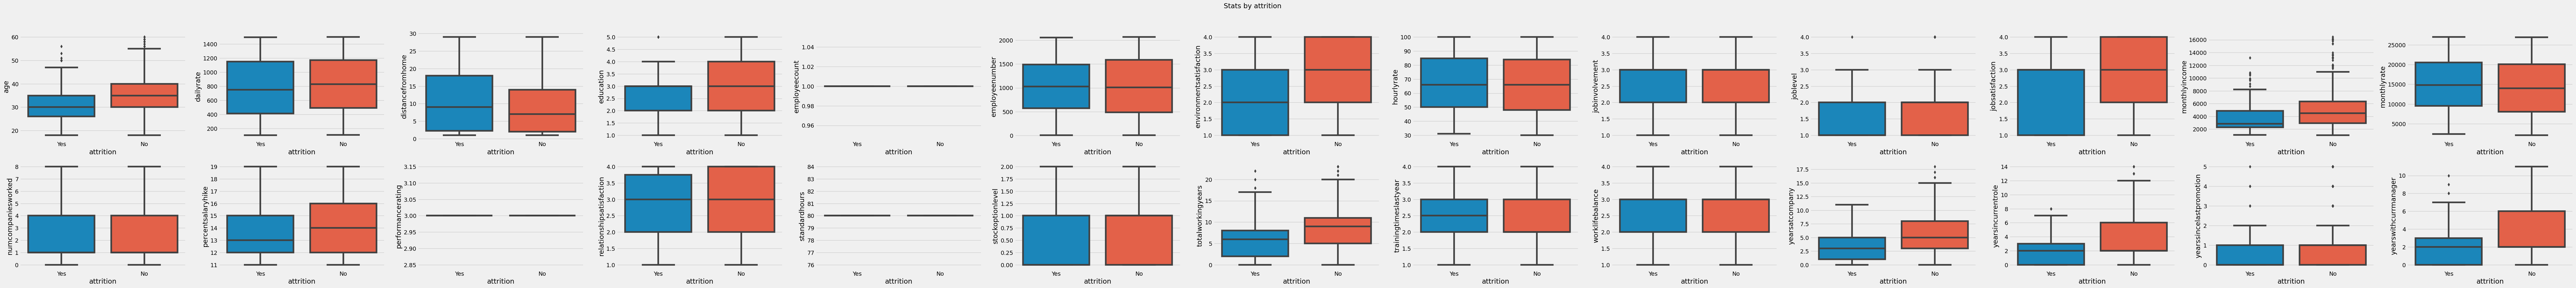

In [ ]:
# Recheck for outliers
# YOUR CODE HERE
fig, axes = plt.subplots(2, 13, figsize=(100, 10))

fig.suptitle('Stats by attrition')

sns.boxplot(ax=axes[0, 0], data=data, x='attrition', y=df_numerical[0])
sns.boxplot(ax=axes[0, 1], data=data, x='attrition', y=df_numerical[1])
sns.boxplot(ax=axes[0, 2], data=data, x='attrition', y=df_numerical[2])
sns.boxplot(ax=axes[0, 3], data=data, x='attrition', y=df_numerical[3])
sns.boxplot(ax=axes[0, 4], data=data, x='attrition', y=df_numerical[4])
sns.boxplot(ax=axes[0, 5], data=data, x='attrition', y=df_numerical[5])
sns.boxplot(ax=axes[0, 6], data=data, x='attrition', y=df_numerical[6])
sns.boxplot(ax=axes[0, 7], data=data, x='attrition', y=df_numerical[7])
sns.boxplot(ax=axes[0, 8], data=data, x='attrition', y=df_numerical[8])
sns.boxplot(ax=axes[0, 9], data=data, x='attrition', y=df_numerical[9])
sns.boxplot(ax=axes[0, 10], data=data, x='attrition', y=df_numerical[10])
sns.boxplot(ax=axes[0, 11], data=data, x='attrition', y=df_numerical[11])
sns.boxplot(ax=axes[0, 12], data=data, x='attrition', y=df_numerical[12])


sns.boxplot(ax=axes[1, 0], data=data, x='attrition', y=df_numerical[13])
sns.boxplot(ax=axes[1, 1], data=data, x='attrition', y=df_numerical[14])
sns.boxplot(ax=axes[1, 2], data=data, x='attrition', y=df_numerical[15])
sns.boxplot(ax=axes[1, 3], data=data, x='attrition', y=df_numerical[16])
sns.boxplot(ax=axes[1, 4], data=data, x='attrition', y=df_numerical[17])
sns.boxplot(ax=axes[1, 5], data=data, x='attrition', y=df_numerical[18])
sns.boxplot(ax=axes[1, 6], data=data, x='attrition', y=df_numerical[19])
sns.boxplot(ax=axes[1, 7], data=data, x='attrition', y=df_numerical[20])
sns.boxplot(ax=axes[1, 8], data=data, x='attrition', y=df_numerical[21])
sns.boxplot(ax=axes[1, 9], data=data, x='attrition', y=df_numerical[22])
sns.boxplot(ax=axes[1, 10], data=data, x='attrition', y=df_numerical[23])
sns.boxplot(ax=axes[1, 11], data=data, x='attrition', y=df_numerical[24])
sns.boxplot(ax=axes[1, 12], data=data, x='attrition', y=df_numerical[25])

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
data['attrition'].value_counts()

No     577
Yes    122
Name: attrition, dtype: int64

<Axes: >

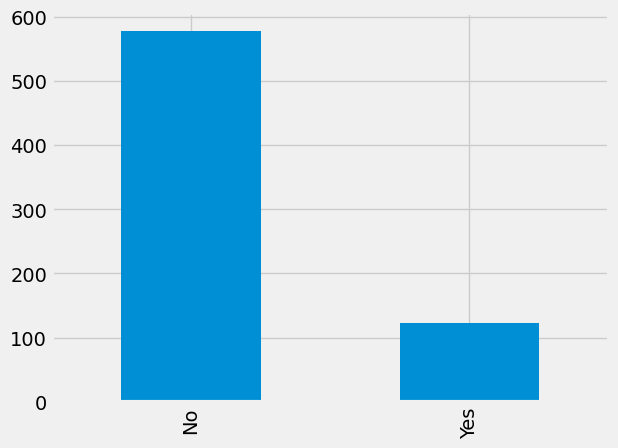

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
data['attrition'].value_counts().plot(kind='bar')

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = data.drop(df_categorical.tolist(),axis=1)
y = data.attrition
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
X_train_1, y_train_1 = smote.fit_resample(X_train, y_train)

<Axes: >

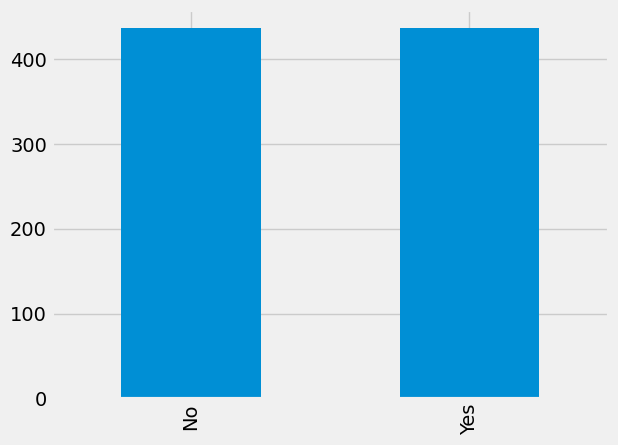

In [ ]:
y_train_1.value_counts().plot(kind='bar')

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

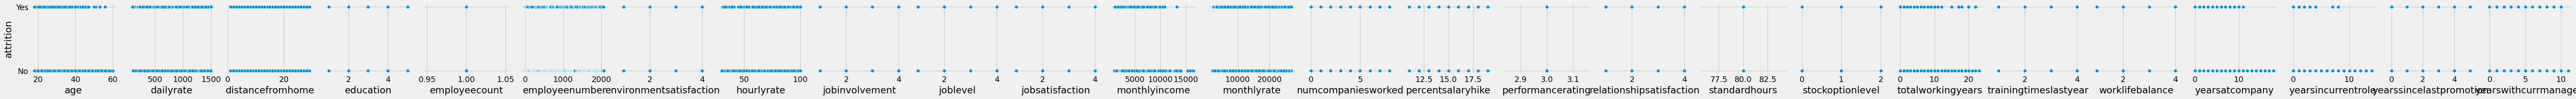

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
sns.pairplot(data=data,
                  x_vars=df_numerical,
                  y_vars=['attrition'])

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

<Axes: >

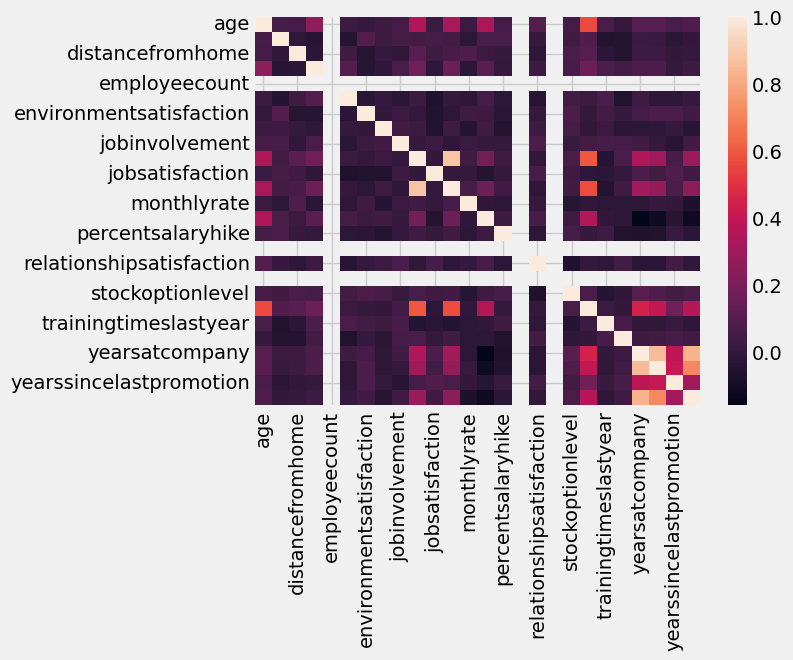

In [ ]:
# Visualize heatmap
# YOUR CODE HERE
sns.heatmap(data[df_numerical.tolist()].corr())

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
# YOUR CODE HERE
data[df_categorical.tolist()]

,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
11,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y,Yes
12,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No
...,...,...,...,...,...,...,...,...,...
1463,No,Non-Travel,Research & Development,Medical,Male,Manufacturing Director,Single,Y,No
1464,No,Travel_Rarely,Sales,Other,Female,Sales Representative,Single,Y,No
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
data['overtime_c'] = data['overtime'].map({'Yes':1,'No':0})
data['attrition_c'] = data['attrition'].map({'Yes':1,'No':0})

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinalencoder = OrdinalEncoder()
# ordinalencoder.fit_transform(data[['businesstravel']])
data['travel'] = data['businesstravel'].map({'Non-Travel':-1,'Travel_Rarely':0,'Travel_Frequently':1})

<Axes: >

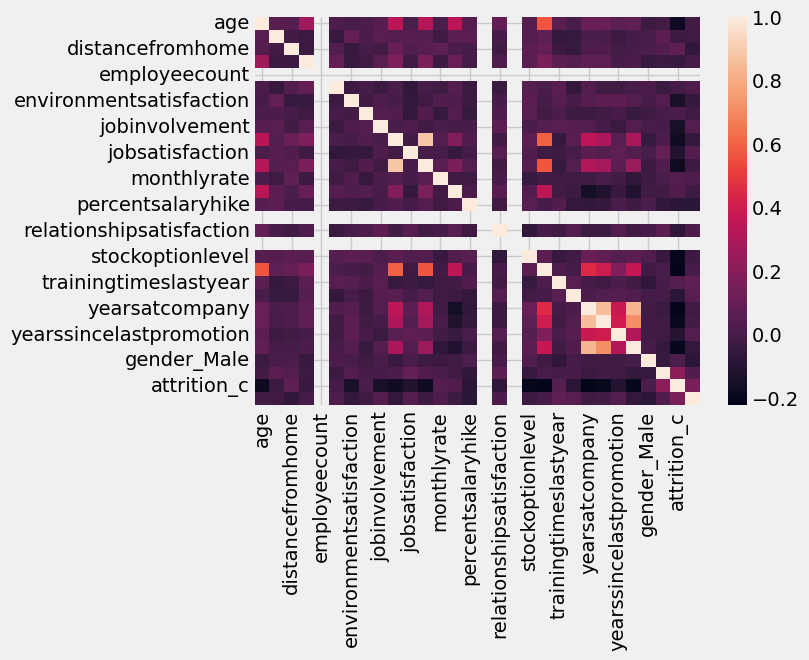

In [ ]:
sns.heatmap(data.corr())

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance. 

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
# YOUR CODE HERE
cat_data = data.select_dtypes('number').copy()

In [ ]:
# Target Column
# YOUR CODE HERE
target = cat_data[['attrition_c']]

In [ ]:
# Feature Space
# YOUR CODE HERE
feature = cat_data.drop('attrition_c',axis=1,inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature,target)

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:** 
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model
# YOUR CODE HERE
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

In [ ]:
# Model training
# YOUR CODE HERE
clf.fit(X_train, y_train, 
        eval_set=(X_test, y_test), 
        verbose=False
)

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE   
clf.predict(data=X_test)
cat_score = clf.score(X_test,y_test)
cat_f1 = f1_score(clf.predict(X_test), y_test)
cat_roc = roc_auc_score(clf.predict(X_test),y_test)

In [ ]:
# Create CatBoost model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

CBC=CatBoostClassifier()

parameters = {'depth' : [1,2,3,4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04,0.1],
                  'iterations'    : [5,10,20,30,40,50,60,70,80,90,100],
                 }
                   
grid = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 5, n_jobs=-1)

# Model training
grid.fit(X_train, y_train)

# Model performance on all sets
best_params = grid.best_params_

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
 
best_pipe.fit(X_train,y_train)

pred = best_pipe.predict(X_test)

acc_score_cat = accuracy_score(y_test, pred)
roc_score_cat = roc_auc_score(y_test, pred)
f1_score_cat = f1_score(y_test, pred,zero_division=1)

0:	learn: 0.6302077	total: 3.71ms	remaining: 182ms
1:	learn: 0.5683463	total: 6.77ms	remaining: 162ms
2:	learn: 0.5310534	total: 9.4ms	remaining: 147ms
3:	learn: 0.4776917	total: 11.9ms	remaining: 137ms
4:	learn: 0.4390283	total: 14.6ms	remaining: 131ms
5:	learn: 0.4109417	total: 17ms	remaining: 125ms
6:	learn: 0.3900633	total: 19.5ms	remaining: 120ms
7:	learn: 0.3720472	total: 22.1ms	remaining: 116ms
8:	learn: 0.3512645	total: 24.6ms	remaining: 112ms
9:	learn: 0.3309197	total: 27.3ms	remaining: 109ms
10:	learn: 0.3141604	total: 29.9ms	remaining: 106ms
11:	learn: 0.3026043	total: 32.5ms	remaining: 103ms
12:	learn: 0.2912569	total: 35ms	remaining: 99.5ms
13:	learn: 0.2794873	total: 37.6ms	remaining: 96.7ms
14:	learn: 0.2721332	total: 40.1ms	remaining: 93.5ms
15:	learn: 0.2604431	total: 43.2ms	remaining: 91.7ms
16:	learn: 0.2509068	total: 45.9ms	remaining: 89.2ms
17:	learn: 0.2424084	total: 48.4ms	remaining: 86ms
18:	learn: 0.2332124	total: 50.9ms	remaining: 83ms
19:	learn: 0.2269340	tot

In [ ]:
f1_score_cat

0.23809523809523808

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss. 

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
# YOUR CODE HERE
xg_data = data.select_dtypes('number').copy()

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE 

# already handled in PreProcessing

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE 
# doing that while selecting the features

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE
xg_data = xg_data.rename(columns={'attrition_c':'attrition'})

In [ ]:
# Feature Space
# YOUR CODE HERE
feature = xg_data.drop('attrition',axis=1,inplace=False)
# Targer label
# YOUR CODE HERE
target = xg_data[['attrition']]

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:** 
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=0)

In [ ]:
# Create XGBoost classifier model
# YOUR CODE HERE
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
# Model training
# YOUR CODE HERE
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

### Model Performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE
xg_score = model.score(X_test,y_test)
xg_f1 = f1_score(model.predict(X_test), y_test)
xg_roc = roc_auc_score(model.predict(X_test),y_test)

In [ ]:
# Create XGBoost classifier model
xg_boost=XGBClassifier()

xg_parameters = { 'max_depth': [4,5,6,7,8,9,10],
    'eta': [0.1,0.3,0.4,0.5,0.01,0.02,0.03,0.04,0.05]
                }
        
xg_grid = GridSearchCV(estimator=xg_boost, param_grid = xg_parameters, cv = 2, n_jobs=-1)

# Model training
 
xg_grid.fit(X_train,y_train)
xg_bestparams = xg_grid.best_params_

# Stores the optimum model in best_pipe
xg_best_pipe = xg_grid.best_estimator_

xg_best_pipe.fit(X_train,y_train)

xg_pred = xg_best_pipe.predict(X_test)

# Model performance on all sets
acc_score_xg = accuracy_score(y_test, xg_pred)
roc_score_xg = roc_auc_score(y_test, xg_pred)
f1_score_xg = f1_score(y_test, xg_pred,zero_division=1)

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss). 

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE   
lgbm = data.select_dtypes('number').copy()
# Handling categorical features
# YOUR CODE HERE   

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE   

# Rename target column
# YOUR CODE HERE   

# Features Space
# YOUR CODE HERE   
feature = lgbm.drop('attrition_c',axis=1,inplace=False)

# Target Label
# YOUR CODE HERE 
target = lgbm[['attrition_c']]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.33, random_state=0)

### Model Definition

**Hint:** 
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE 
model_lgbm = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

In [ ]:
# Model training
# YOUR CODE HERE
model_lgbm.fit(X_train,y_train,
          verbose=20,eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE
lgbm_score = model_lgbm.score(X_test,y_test)
lgbm_f1 = f1_score(model_lgbm.predict(X_test), y_test)
lgbm_roc = roc_auc_score(model_lgbm.predict(X_test),y_test)

In [ ]:
# Create LightGBM classifier model
lgbm=LGBMClassifier()

lgbm_parameters = {'max_depth' : [4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04,0.1],
                 }
  
lg_grid = GridSearchCV(estimator=lgbm, param_grid = lgbm_parameters, cv = 2, n_jobs=-1)

# Model training
lg_grid.fit(X_train,y_train)
lg_best_params = lg_grid.best_params_

# Stores the optimum model in best_pipe
lg_best_pipe = lg_grid.best_estimator_
 
lg_best_pipe.fit(X_test,y_test)

lg_pred = lg_best_pipe.predict(X_test)

# Model performance on all sets
acc_score_lgbm = accuracy_score(y_test, lg_pred)
roc_score_lgbm = roc_auc_score(y_test, lg_pred)
f1_score_lgbm = f1_score(y_test, lg_pred,zero_division=1)

In [ ]:
acc_score_lgbm

0.8571428571428571

## Results 

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
lst1 = ['Cat Boost','XGBoost','LGBM']
lst2 = [cat_score,xg_score,lgbm_score]
lst3 = [cat_f1,xg_f1,lgbm_f1]
lst4 = [cat_roc,xg_roc,lgbm_roc]

pd.DataFrame(list(zip(lst1, lst2, lst3, lst4)),columns =['Model', 'Accuracy','F1','ROC'])

,Model,Accuracy,F1,ROC
0,Cat Boost,0.834286,0.121212,0.916185
1,XGBoost,0.848485,0.492754,0.774466
2,LGBM,0.839827,0.463768,0.752039


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
lst1 = ['Cat Boost','XGBoost','LGBM']
lst2 = [acc_score_cat,acc_score_xg,acc_score_lgbm]
lst3 = [f1_score_cat,f1_score_xg,f1_score_lgbm]
lst4 = [roc_score_cat,roc_score_xg,roc_score_lgbm]

pd.DataFrame(list(zip(lst1, lst2, lst3, lst4)),columns =['Model', 'Accuracy','F1','ROC'])

,Model,Accuracy,F1,ROC
0,Cat Boost,0.891429,0.457143,0.650490
1,XGBoost,0.844156,0.333333,0.599599
2,LGBM,0.857143,0.400000,0.625000
